# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: NGOC BAO VY LE
#### Student ID: S3828276

Date: 01 SEP 2021


## Importing libraries 

In [1]:
import pandas as pd
import re
import numpy as np
import datetime
import xml.etree.ElementTree as etree
from itertools import chain
import difflib
%matplotlib inline

## Task 1. Parsing Data

### 1.1. Examining and loading data

In [2]:
tree = etree.parse('S3828276_dataset1.xml')
tree

In [3]:
# root node

root = tree.getroot()

print('root elements : ',root)
print('the length: ', len(root))
print('the root tag: ',root.tag)
print('root attribute: ', root.attrib)
print('text: ', root.text)

root elements :  <Element 'JobAds' at 0x000002AB47664B80>
the length:  107
the root tag:  JobAds
root attribute:  {}
text:  



In [4]:
# the tags for root's child
set([child.tag for child in root])

{'Source'}

##### Source

In [5]:
[[child.tag, child.attrib, child.text] for child in root]

[['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source', {}, '\n'],
 ['Source',

There are 107 Source tags

In [6]:
sources = [child for child in root]
len(sources)

107

In [7]:
sources

[<Element 'Source' at 0x000002AB47664BD0>,
 <Element 'Source' at 0x000002AB48622A40>,
 <Element 'Source' at 0x000002AB48A41950>,
 <Element 'Source' at 0x000002AB48AA2D10>,
 <Element 'Source' at 0x000002AB48B64A40>,
 <Element 'Source' at 0x000002AB48CCC4F0>,
 <Element 'Source' at 0x000002AB491B7F90>,
 <Element 'Source' at 0x000002AB493C6040>,
 <Element 'Source' at 0x000002AB49450720>,
 <Element 'Source' at 0x000002AB4A093EF0>,
 <Element 'Source' at 0x000002AB4A163B30>,
 <Element 'Source' at 0x000002AB4A3FEDB0>,
 <Element 'Source' at 0x000002AB4A5B8680>,
 <Element 'Source' at 0x000002AB4A6CCEF0>,
 <Element 'Source' at 0x000002AB4A75D810>,
 <Element 'Source' at 0x000002AB4ABE5E00>,
 <Element 'Source' at 0x000002AB4AC51130>,
 <Element 'Source' at 0x000002AB4B1CDEA0>,
 <Element 'Source' at 0x000002AB4B49F360>,
 <Element 'Source' at 0x000002AB4B549680>,
 <Element 'Source' at 0x000002AB4B6524A0>,
 <Element 'Source' at 0x000002AB4B9FFEA0>,
 <Element 'Source' at 0x000002AB4BA0AC20>,
 <Element '

Each Source tag has different length, no attribute and no text

In [8]:
# check if each source has attribute or text
[(len(child), child.tag, child.attrib, child.text) for child in sources]

[(8372, 'Source', {}, '\n'),
 (2319, 'Source', {}, '\n'),
 (207, 'Source', {}, '\n'),
 (401, 'Source', {}, '\n'),
 (814, 'Source', {}, '\n'),
 (2966, 'Source', {}, '\n'),
 (1094, 'Source', {}, '\n'),
 (357, 'Source', {}, '\n'),
 (7384, 'Source', {}, '\n'),
 (435, 'Source', {}, '\n'),
 (1570, 'Source', {}, '\n'),
 (1123, 'Source', {}, '\n'),
 (615, 'Source', {}, '\n'),
 (310, 'Source', {}, '\n'),
 (2715, 'Source', {}, '\n'),
 (236, 'Source', {}, '\n'),
 (3039, 'Source', {}, '\n'),
 (1956, 'Source', {}, '\n'),
 (359, 'Source', {}, '\n'),
 (592, 'Source', {}, '\n'),
 (2058, 'Source', {}, '\n'),
 (26, 'Source', {}, '\n'),
 (385, 'Source', {}, '\n'),
 (226, 'Source', {}, '\n'),
 (362, 'Source', {}, '\n'),
 (587, 'Source', {}, '\n'),
 (284, 'Source', {}, '\n'),
 (126, 'Source', {}, '\n'),
 (333, 'Source', {}, '\n'),
 (44, 'Source', {}, '\n'),
 (617, 'Source', {}, '\n'),
 (135, 'Source', {}, '\n'),
 (58, 'Source', {}, '\n'),
 (1074, 'Source', {}, '\n'),
 (277, 'Source', {}, '\n'),
 (1149, 'So

#### JobAd and SourceName Element

JobAd and SourceName are direct children of Source

In [9]:
set(chain.from_iterable([[child.tag for child in source] for source in sources]))

{'JobAd', 'SourceName'}

#### JobAd
JobAd has 9 kind of tags

In [10]:
set(chain.from_iterable([[child.tag for child in jobAd] for jobAd in root.iter(tag='JobAd')]))

{'Category',
 'CloseDate',
 'Company',
 'ContractTime',
 'ContractType',
 'Location',
 'OpenDate',
 'Salary',
 'Title'}

There are 50703 jobAd tags in the file

In [11]:
len([c for c in root.iter(tag='JobAd')])

50703

JobAd elements has no text

In [12]:
set([c.text for c in root.iter(tag='JobAd')])

{'\n'}

JobAd elements have atrribute ID in dict()

In [13]:
len([c.attrib for c in root.iter(tag='JobAd')])

50703

each JobAd element has a different number of child element

In [14]:
set([len(child) for child  in root.findall('Source/JobAd')])

{5, 6, 7, 8, 9}

Category, CloseDate, Company, ContractTime, ContractType, Location, OpenDate, Salary and Title are direct children of JobAd elements. They are the leaf nodes of the tree.

In [15]:
leaf_node = list(set(chain.from_iterable([[child.tag for child in jobAd] for jobAd in root.iter(tag='JobAd')])))
for leaf in leaf_node:
    print(leaf, ':', set(chain.from_iterable([[i for i in child] for child in root.iter(tag=leaf)])))

ContractType : set()
OpenDate : set()
Salary : set()
Category : set()
CloseDate : set()
Location : set()
Company : set()
Title : set()
ContractTime : set()


the leaf nodes have not attribute

In [16]:
for leaf in leaf_node:
    print(leaf, ':', set(chain.from_iterable([child.attrib for child in root.iter(tag=leaf)])))

ContractType : set()
OpenDate : set()
Salary : set()
Category : set()
CloseDate : set()
Location : set()
Company : set()
Title : set()
ContractTime : set()


the leaf nodes have text 

In [17]:
for leaf in leaf_node:
    print(leaf, ':', all([len(child.text) != 0 for child in root.iter(tag=leaf)]))

ContractType : True
OpenDate : True
Salary : True
Category : True
CloseDate : True
Location : True
Company : True
Title : True
ContractTime : True


#### SourceName
the SourceName size is equal to root element size at 107. It means that there are one Source name for each source

In [18]:
sourceNames = tree.findall('Source/SourceName')
len(sourceNames)

107

SourceName has no child

In [19]:
set(chain.from_iterable([[c for c in child] for child in sourceNames]))

set()

SourceName elements has no attribute

In [20]:
set(chain.from_iterable([child.attrib for child in sourceNames]))

set()

each SourceName elements has text

In [21]:
all([len(child.text) !=0 for child in sourceNames])

True

##### Conclusion for part 1.1 Parsing data
There are 107 Sources in the JobAds element.<br>
Each Source element has one SourceName element and vary number of JobAd elements.<br>
Each SourName element has text , no attribute and no child.<br>
Each JobAd elements has vary number of children. <br>
Children tags are Category, CloseDate, Company, ContractTime, ContractType, Location, OpenDate, Salary and Title

### 1.2 Parsing data into the required format

In [22]:
# create a dictionary to store element's info
dataDict={}

# each element is a array of values corresponded to each job ad
dataDict['ID'] = []
dataDict['Title'] = []
dataDict['Location'] = []
dataDict['Company'] = []
dataDict['ContractType'] = []
dataDict['ContractTime'] = []
dataDict['Category'] = []
dataDict["Salary"] = []
dataDict["OpenDate"] = []
dataDict['CloseDate'] = []
dataDict['SourceName'] = []

# iterate to each job ad to extract children info
for elem in root.iter('JobAd'):
    
    dataDict['ID'].append(elem.attrib['ID']) 
    
    dataDict['Title'].append(''.join([sa.text for sa in elem.findall('Title')]))
    
    dataDict['Location'].append(''.join([loc.text for loc in elem.findall('Location')]))
    
    dataDict['Company'].append(''.join([com.text for com in elem.findall('Company')]))
                              
    dataDict['ContractType'].append(''.join([contr.text for contr in elem.findall('ContractType')]))
    
    dataDict['ContractTime'].append(''.join([contime.text for contime in elem.findall('ContractTime')]))
    
    dataDict['Category'].append(''.join([cat.text for cat in elem.findall('Category')]))
    
    dataDict["Salary"].append(''.join([sa.text for sa in elem.findall('Salary')]))
    
    dataDict["OpenDate"].append(''.join([op.text for op in elem.findall('OpenDate')]))
    
    dataDict['CloseDate'].append(''.join([clo.text for clo in elem.findall('CloseDate')]))
    
    
for elem in root:
    name = elem[0].text
    for job in elem.findall('JobAd'):
        dataDict['SourceName'].append(name)   

In [23]:
print('ID:', len(dataDict['ID']))
print('Title:', len(dataDict['Title']))
print('Location:', len(dataDict['Location']))
print("Company:", len(dataDict['Company']))
print('ContractType:', len(dataDict['ContractType']))
print('ContractTime:', len(dataDict['ContractTime']))
print('Category:', len(dataDict['Category']))
print("Salary:", len(dataDict["Salary"]))
print("OpenDate:", len(dataDict["OpenDate"]))
print('CloseDate:', len(dataDict['CloseDate']))
print('SourceName: ', len(dataDict['SourceName']))

ID: 50703
Title: 50703
Location: 50703
Company: 50703
ContractType: 50703
ContractTime: 50703
Category: 50703
Salary: 50703
OpenDate: 50703
CloseDate: 50703
SourceName:  50703


In [24]:
df = pd.DataFrame(dataDict)
df.head()

,ID,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,71851622,Accounts Payable Team Lead w/Oracle €****k,UK,Adecco Group,N/A,permanent,Accounting & Finance Jobs,47500,20130112T000000,20130313T000000,totaljobs.com
1,69170699,Head of IT/ IT Manager,UK,Senitor Associates,N/A,permanent,IT Jobs,47500,20131215T120000,20140315T120000,totaljobs.com
2,68701057,Business Development Manager Marketing/Digital,UK,Pure Recruitment,N/A,permanent,"PR, Advertising & Marketing Jobs",32500,20130706T000000,20130904T000000,totaljobs.com
3,65183561,Project/Design Engineer,Wales,HUNTER SELECTION,N/A,permanent,Engineering Jobs,27500,20130916T150000,20131016T150000,totaljobs.com
4,68712637,Italian and/or Spanish Inside Sales Representa...,London,Euro London Appointments London,N/A,permanent,Sales Jobs,32500,20120404T150000,20120703T150000,totaljobs.com


In [25]:
df.shape

(50703, 11)

<i>Summary:<i>all info of selected elements are extracted in a dataframe

......

## Task 2. Auditing and cleansing the loaded data


In [26]:
# general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            50703 non-null  object
 1   Title         50703 non-null  object
 2   Location      50703 non-null  object
 3   Company       50703 non-null  object
 4   ContractType  50703 non-null  object
 5   ContractTime  50703 non-null  object
 6   Category      50703 non-null  object
 7   Salary        50703 non-null  object
 8   OpenDate      50703 non-null  object
 9   CloseDate     50703 non-null  object
 10  SourceName    50703 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [27]:
# create and error recorder (i.e. the erlist)
itemlist = ['indexOfdf','Id', 'ColumnName', 'Orignal', 'Modified', 'ErrorType','Fixing']
erlist = pd.DataFrame(columns=itemlist)
erlist
# update error list by attributes
def updateErlist(indexOfdf, Id, ColumnName, Orignal, Modified, ErrorType, Fixing):
    errItem=[indexOfdf,Id, ColumnName, Orignal, Modified, ErrorType,Fixing]
    erlist.loc[len(erlist)]=errItem

##### 2.1. ID CLEANSING

In [28]:
# check for non digit pattern
print('all IDs is number')
df.ID.apply(lambda x: re.findall(r'\D+', x)).astype('str').value_counts()

all IDs is number


[]    50703
Name: ID, dtype: int64

In [29]:
# check for missing values
df.ID.apply(lambda x: re.findall(r'^N/A$|^\s+$', x)).astype('str').value_counts()

[]    50703
Name: ID, dtype: int64

In [30]:
# check for row which non digit characters
df.ID.apply(lambda x: re.findall(r'^\D{8}$',x)).astype('str').value_counts()

[]    50703
Name: ID, dtype: int64

In [31]:
# convert ID to int
df.ID = df.ID.apply(lambda x : int(x))

In [32]:
# updating error list
updateErlist('ALL', 'ALL', 'ID', 'ALL', 'ALL', 'Wrong data type', 'type cast from string to integer')

##### 2.2. Title

In [33]:
df.Title.value_counts()

Theatre Nurses                                                      2
Primary Teacher Vacancies  Rotherham                                2
C ASPNet Developer  Basingstoke  ****k To ****k                     2
Sponsorship Sales Manager                                           1
Business Development Manager/ Cloud Sales/ Software Sales           1
                                                                   ..
Change / Project Manager  Finance                                   1
Networks & Linux Consultant                                         1
Accounts Assistant x ****                                           1
Grails Developers Permanent Home Based                              1
Proposals Coordinator  North West London  **** 12 month contract    1
Name: Title, Length: 50700, dtype: int64

In [34]:
# check for missing values
df.Title.apply(lambda x: re.findall(r'^\W+$',x)).astype('str').value_counts()

[]          50702
['****']        1
Name: Title, dtype: int64

In [35]:
df.Title.apply(lambda x: re.findall(r'^N/A$',x)).astype('str').value_counts()

[]    50703
Name: Title, dtype: int64

In [36]:
# find indice of the error
df[df.Title == '****']

,ID,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
18593,50870368,****,UK,Rullion Engineering Ltd,,permanent,Engineering Jobs,34500,20130903T120000,20131202T120000,cv-library.co.uk


In [37]:
# report
updateErlist(18593, df.loc[18593, 'ID'], 'Title', '****', 'non_specific', 'missing values', 'change to non_specific')

# fix
df.loc[18593, 'Title'] =  'non_specific'


#### 2.3. Category 

In [38]:
# check unique values and their frequency 
df.Category.value_counts()

IT Jobs                             13133
Healthcare & Nursing Jobs            8184
Engineering Jobs                     7201
Accounting & Finance Jobs            6801
Sales Jobs                           4743
Hospitality & Catering Jobs          4530
Teaching Jobs                        3559
PR, Advertising & Marketing Jobs     2552
Name: Category, dtype: int64

In [39]:
# all categorical values are matching
df.Category.value_counts().sum()

50703

<i>Summary: <i>All the category values are matching with <br>
    IT Jobs<br> Healthcare & Nursing Jobs<br> Engineering Jobs <br> Accounting & Finance Jobs <br> Sales Jobs <br> Hospitality & Catering Jobs<br> Teaching Jobs<br> PR, Advertising & Marketing Jobs<br>
It is clear of error

##### 2.4. Location   

In [40]:
# check for values in Location
df.Location.sort_values().unique()

array(['ABERDEEN', 'Aberdeen', 'Aberdeenshire', 'Abingdon', 'Accrington',
       'Addlestone', 'Alcester', 'Aldershot', 'Alfreton', 'Alton',
       'Altrincham', 'Amersham', 'Andover', 'Antrim', 'Arundel',
       'Ash Green', 'Ashford', 'Avon', 'Axbridge', 'Aylesbury', 'BRISTOL',
       'Bagshot', 'Banbury', 'Bangor', 'Barking', 'Barnet', 'Barnsley',
       'Barnstaple', 'Barrow-In-Furness', 'Basildon', 'Basingstoke',
       'Bath', 'Beaconsfield', 'Bedford', 'Bedfordshire', 'Belfast',
       'Berkshire', 'Bexhill-On-Sea', 'Bexley', 'Bicester', 'Birkenhead',
       'Birmingham', 'Blackburn', 'Blackpool', 'Blaenau Gwent',
       'Bognor Regis', 'Boldon Colliery', 'Bolton', 'Bolton Le Sands',
       'Borehamwood', 'Boston', 'Bourne End', 'Bournemouth', 'Bracknell',
       'Bradford', 'Braintree', 'Brent Cross', 'Brentwood', 'Bridgend',
       'Bridgwater', 'Brierley Hill', 'Brighton', 'Bristol', 'Broadfield',
       'Bromley', 'Bromsgrove', 'Buckingham', 'Buckinghamshire',
       'Burges

In [41]:
# check for string with \W character
print('The are not error')
df.Location.apply(lambda x: re.findall(r'\w+-\w+-\w+', x)).astype('str').value_counts().index[1:]


The are not error


Index(['['Stoke-On-Trent']', '['Stratford-Upon-Avon']', '['Burton-On-Trent']',
       '['Marton-In-Cleveland']', '['Southend-On-Sea']',
       '['Henley-On-Thames']', '['Walton-On-Thames']', '['Clacton-On-Sea']',
       '['Bexhill-On-Sea']', '['Barrow-In-Furness']', '['Stockton-On-Tees']',
       '['Weston-Super-Mare']', '['Newcastle-under-Lyme']',
       '['Sutton-In-Ashfield']'],
      dtype='object')

In [42]:
# check for \W character between words
print('no error')
df.Location.apply(lambda x: re.findall(r'\w+\s*[.]\s*\w+', x)).astype('str').value_counts()

no error


[]                 50559
['St. Albans']        50
['St. Edmunds']       41
['St. Helens']        25
['St. Neots']         10
['St. Andrew']         9
['St. Ives']           9
Name: Location, dtype: int64

In [43]:
# check unique values and their frequency
data = df.Location.value_counts()

In [44]:
# check the values have low frequency
data[data<12]

Dumfries                11
Twickenham              11
Knaresborough           11
Brent Cross             11
Alton                   11
Newcastle-under-Lyme    11
Caerphilly              11
Herefordshire           11
Wisbech                 11
Newport Pagnell         11
Alcester                11
Cliddesden              11
Frome                   11
Broadfield              11
Thames Ditton           11
Wincanton               11
Sutton Coldfield        11
Trent                   11
Linlithgow              11
Sutton-In-Ashfield      11
Cwmbran                 11
Bridgwater              11
Redcar                  11
Bourne End              11
Lewisham                10
Normanton               10
Jersey                  10
Boston                  10
Tadworth                10
Canary Wharf            10
St. Neots               10
North Ayrshire          10
South Brent             10
Thorpe St. Andrew        9
Lutterworth              9
Gatwick                  9
Waterlooville            9
S

In [45]:
# check for matching location
similar= {}
empty=[]
location = df.Location.unique()

for i in location:
    a= difflib.get_close_matches(i, set(location).difference([i]), n=1, cutoff=0.8)
    if len(a) != 0:
        similar.setdefault(i,a)
    else:
        empty.append(i) 

In [46]:
empty

['UK',
 'Wales',
 'Slough',
 'Basingstoke',
 'Hampshire',
 'Birkenhead',
 'Kent',
 'Devon',
 'Aberdeen',
 'Hove',
 'Greater Manchester',
 'Wilmslow',
 'East Sheen',
 'Fife',
 'Brighton',
 'Uckfield',
 'Milton Keynes',
 'Edinburgh Technopole',
 'Swindon',
 'Exeter',
 'North Lambeth',
 'Oxfordshire',
 'Guildford',
 'Reigate',
 'Rugby',
 'Bracknell',
 'Harrogate',
 'Droitwich',
 'Sunderland',
 'Cheshire',
 'Doncaster',
 'Torquay',
 'Poole',
 'Cumbria',
 'Cheltenham',
 'Bromsgrove',
 'Reading',
 'Leicestershire',
 'York',
 'Newcastle Upon Tyne',
 'Wakefield',
 'Huddersfield',
 'Bournemouth',
 'Christchurch',
 'Grantham',
 'Warwick',
 'Aylesbury',
 'Havant',
 'Surrey',
 'Portsmouth',
 'Redhill',
 'Loughborough',
 'Yorkshire and Humberside',
 'Crawley',
 'Chesterfield',
 'Abingdon',
 'Salisbury',
 'Lincoln',
 'Somerset',
 'Canterbury',
 'Wellingborough',
 'Derbyshire',
 'Alfreton',
 'Skipton',
 'West Malling',
 'Carlisle',
 'Sheffield',
 'Kidderminster',
 'Waterlooville',
 'Aldershot',
 'Avo

In [47]:
similar

{'London': ['london'],
 'South East London': ['South West London'],
 'West Midlands': ['East Midlands'],
 'Nottingham': ['Nottinghamshire'],
 'Gloucestershire': ['Worcestershire'],
 'Oxford': ['Oxfords'],
 'West Sussex': ['East Sussex'],
 'Bradford': ['Bedford'],
 'Leicester': ['Bicester'],
 'South Yorkshire': ['North Yorkshire'],
 'North West London': ['South West London'],
 'Worcester': ['Dorchester'],
 'North Ayrshire': ['North Yorkshire'],
 'Chester': ['Colchester'],
 'Newbury': ['Dewsbury'],
 'Warrington': ['Workington'],
 'Buckinghamshire': ['Buckingham'],
 'Leeds': ['Lewes'],
 'Northampton': ['Southampton'],
 'Washington': ['Warrington'],
 'Chichester': ['Chester'],
 'Gloucester': ['Gloucestershire'],
 'Hereford': ['Hertford'],
 'Liverpool': ['Livepool'],
 'Scarborough': ['Farnborough'],
 'South West London': ['South East London'],
 'North East England': ['South East England'],
 'East Midlands': ['West Midlands'],
 'North Yorkshire': ['South Yorkshire'],
 'Rochester': ['Dorchest

In [48]:
# place the errors and their correct version in a dict
replace_dict = {'ABERDEEN':'Aberdeen','BRISTOL':'Bristol','Livepool':'Liverpool', 'Oxfords':'Oxfords','birmingham':'Birmingham', 
                     'london':'London', 'HAMpshire':'Hampshire','Manchaster':"Manchester",'Cembridge':'Cambridge',  
                     'Leads':'Leeds', 'Aberbeen':'Aberdeen', 'Trent':'Stoke-On-Trent'}

# locating indices of errors
ind =df.loc[df.Location.isin(replace_dict.keys()), 'Location'].index


                   
# adding errors
for i in ind: 
    updateErlist(i, df.loc[i, 'ID'], 'Location', df.loc[i, 'Location'], replace_dict[df.loc[i, 'Location']], 'irregularities/typos', 'change to the right form/speeling')                

# fix the typos
df.Location.replace(replace_dict,inplace=True)


##### 2.5. Company

In [49]:
# check for unique value and their frequency
df.Company.value_counts()

                                   2678
                                   2017
-                                   557
UKStaffsearch                       434
Randstad                            368
                                   ... 
CRIPPLEGATE FOUNDATION                1
Recruitment Solutions Wales Ltd       1
Queen's University Belfast            1
Paymentshield                         1
Lecaris                               1
Name: Company, Length: 8674, dtype: int64

In [50]:
# check for missing values
df.Company.apply(lambda x: re.findall(r'^\W+$|^\d+$|^N/A$|^$', x)).astype('str').value_counts()

[]         45369
['']        2678
[' ']       2017
['-']        557
['N/A']       79
['591']        1
['.']          1
['21']         1
Name: Company, dtype: int64

In [51]:
# locate missing values
indices = df[df.Company.isin(['', ' ', '-', '.', 'N/A', '591', '21'])].index

# reporting errors
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Company', df.loc[i,'Company'], 'non-specified', 'missing values', 'change to non-specified')

# fixing missing value to non-specified
df.loc[indices, 'Company'] = 'non-specified'

In [52]:
# check for middle extra white space
df.Company.apply(lambda x: re.findall(r'^\w+\s{2,}.+$|^\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s\w+\s\w+\s{2}.*$|^\w+\s&\s\w+\s{2,}\w+.*$', x)).astype('str').value_counts().index[1:]

Index(['['Appetite4Recruitment   High End Restaurants, Pubs & Bars']',
       '['Badenoch & Clark   London ']', '['Spectrum IT Recruitment  Ltd']',
       '['Oscar Associates  Limited']', '['Edustaff   Birmingham']',
       '['Searchability  Ltd']', '['Recruitment Solutions  Ltd']',
       '['Computer People  Limited']', '['Badenoch & Clark   Manchester.']',
       '['Blue Arrow   Guildford']',
       ...
       '['McGinley  Ltd']', '['Central Employment Agency  Ltd']',
       '['Robert Half   Manchester']',
       '['UNKNOWN   auto added by vacany import']',
       '['Hudson   Molson Coors']', '['Cobalt Consulting  Ltd']',
       '['Bio Pharma  Ltd.']', '['BROOK STREET BUREAU   Reading']',
       '['Project Resource   Thames Valley & South West England']',
       '['Scottish Association for Marine Science   SAMS']'],
      dtype='object', length=348)

In [53]:
# extra middle white spaces
white_spaces =df.Company.apply(lambda x: re.findall(r'^\w+\s{2,}.+$|^\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s\w+\s{2,}.*$|^\w+\s\w+\s\w+\s\w+\s\w+\s{2}.*$|^\w+\s&\s\w+\s{2,}\w+.*$', x)).astype('str').value_counts().index[1:]
white_spaces = [i.strip(r']|[|\'') for i in white_spaces]

# locate errors
indices = df[df.Company.isin(white_spaces)].index

# report error
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Company', df.loc[i,'Company'], re.sub(r'\s+', ' ', df.loc[i,'Company']), 'Irregularities', 'strip the middle extra white spaces')

# fixing
df.loc[indices, 'Company'] = df.loc[indices, 'Company'].apply(lambda x: re.sub(r'\s+', ' ',x))


In [54]:
# check for \W characters at the end . the start or both in string
df.Company.apply(lambda x: re.findall(r'^(\W+).+$|^.+(\W+)$|^(\W+).+(\W+)$', x)).astype('str').value_counts()

[]                     49437
[('', '.', '', '')]      752
[('', ' ', '', '')]      505
[('@', '', '', '')]        4
[('', '+', '', '')]        2
[('.', '', '', '')]        2
[('', ',', '', '')]        1
Name: Company, dtype: int64

In [55]:
# check for the string starts/ends with +, _, or - 
df.Company.apply(lambda x: re.findall(r'^[+_-]+.+$|^.+[+_-]+$', x)).astype('str').value_counts()

[]             50701
['MPower+']        2
Name: Company, dtype: int64

In [56]:
# check for the string starts/ends with +, _, - or white space
df.Company.apply(lambda x: re.findall(r'^\W+.+$|^.+\W+$|^\W+.+\W+$', x)).astype('str').value_counts()

[]                                49437
['Matchtech Group plc.']            230
['Badenoch & Clark London ']         45
['Monarch Recruitment Ltd.']         30
['Support Services Group ']          27
                                  ...  
['Anglian Windows ']                  1
['General Healthcare Group ']         1
['Havas People Limited ']             1
['@ITS']                              1
['Parade post office stores.']        1
Name: Company, Length: 272, dtype: int64

In [57]:
# white space and dot, @, +, comma at the end/front of string
dot = df.Company.apply(lambda x: re.findall(r'^\W.+$|^.+\W$|^\W+.+\W+$', x)).astype('str').value_counts().index[1:]
dot = [i.strip(r']|[|\'') for i in dot]

# locate errors
indices = df[df.Company.isin(dot)].index

# report error
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Company', df.loc[i,'Company'], df.loc[i,'Company'].strip('. ,@+'), 'Irregularities', 'strip extra white spaces and dot')

# fixing
df.loc[indices, 'Company'] = df.loc[indices, 'Company'].apply(lambda x: x.strip('. ,@+'))

In [58]:
# check for the string with upper letters
df.Company.apply(lambda x: re.findall(r'^[A-Z]+\s[A-Z]{2,}\s*\w*\s*\w*\s*\w*.*$', x)).astype('str').value_counts().index[1:]


Index(['['CAREER TEACHERS']', '['ANSON MCCADE']',
       '['INTERACTION RECRUITMENT']', '['JJ FOX']', '['SOLID STAFF']',
       '['PROTOCOL EDUCATION']', '['GRADUATE FASTTRACK']',
       '['AES TECHNICAL & EXECUTIVE CONSULTANTS']',
       '['CHERRY RED RECRUITMENT']', '['ACADEMICS LTD']',
       ...
       '['THE MEETINGS RECRUITMENT']', '['HAYS EDUCATION PERMANENT']',
       '['ST MARGARET OF SCOTLAND CATHOLIC RPIAMRY']',
       '['CONNAUGHT RESOURCING']', '['CHEFS ETC LIMITED']',
       '['BROOK STREET BUREAU Reading']', '['NIIT TECHNOLOGIES LTD']',
       '['HR GO Glasgow']', '['DOVER FEDERATION FOR THE ARTS']',
       '['MCKINLAY LAW PARTNERSHIP']'],
      dtype='object', length=536)

In [59]:
# upper letter
upper = df.Company.apply(lambda x: re.findall(r'^[A-Z]+\s[A-Z]{2,}\s*\w*\s*\w*\s*\w*.*$', x)).astype('str').value_counts().index[1:]
upper = [i.strip('[]\'') for i in upper ]


# locate errors
indices = df[df.Company.isin(upper )].index


# create a meethod to convert string to capitalize the 1st letter
def capitalized(x):
    array = []
    words = x.split(' ') 
    if len(words[0]) < 4:
        array.append(words[0])
        for w in words[1:]:
            array.append(w.capitalize()) 
    else:
        for w in words:         
            array.append(w.capitalize())    
    return ' '.join(array)


# report
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Company', df.loc[i,'Company'], capitalized(df.loc[i,'Company']), 'irregularities', 'change to capitalized words')

    
# fix
df.loc[indices, 'Company'] = df.loc[indices, 'Company'].apply(lambda x:capitalized(x) )

# check
#df.loc[indices, 'Company']

In [60]:
# check if string have one letter for the 1st and second or 3 
df.Company.apply(lambda x: re.findall(r'^\w\s+\w\s+\w+.+$', x)).astype('str').value_counts()


[]                                   50637
['N E Recruitment']                     11
['H C Solutions']                        7
['A R Resourcing Ltd']                   5
['I F D S Ltd']                          4
['R M Solutions Ltd']                    4
['S T R Group Ltd']                      3
['R M Solutions']                        2
['J P Scarlet & Associates']             2
['C M recruitment']                      1
['E V Offshore Limited']                 1
['R S S Limited']                        1
['A D Recruitment']                      1
['V G Clements Ltd']                     1
['E J CHURCH']                           1
['O L Recruitment']                      1
['R E Personnel']                        1
['S W Ventures Ltd']                     1
['D D London']                           1
['G F Foods Ltd']                        1
['1 1 Recruitment Limited']              1
['B B London LTD']                       1
['P F Jones Ltd']                        1
['F W Media

In [61]:
# white space in the 1st word
white_space = df.Company.apply(lambda x: re.findall(r'^\w\s+\w\s+\w+.+$', x)).astype('str').value_counts().index[1:]
white_space= [i.strip('[]\'') for i in white_space]
indices = df[df.Company.isin(white_space)].index


# create a method to join words
def join_letters(x):
    lisT = x.split(' ')
    
    if len(lisT[2]) >1:
        
        first_2 = ''.join(lisT[:2]).split()
        first_2.append(lisT[-1])
        whole = ' '.join(first_2)
        return whole
    
    if len(lisT[2]) == 1:
        
        if len(lisT[3]) == 1:
            frist_4= ''.join(lisT[:4]).split()
            frist_4.append(lisT[-1])
            whole = ' '.join(frist_4)
            return whole
        
        else:
            frist_3 = ''.join(lisT[:3]).split()
            frist_3.append(lisT[-1])
            whole = ' '.join(frist_3)
            return whole

        
        
# report
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Company', df.loc[i,'Company'],join_letters(df.loc[i,'Company']) , 'irregularities', 'change abb/limited to Limited')

    
# fix
df.loc[indices, 'Company'] = df.loc[indices, 'Company'].apply(lambda x: join_letters(x))

# check
#df.loc[indices, 'Company']

#### 2.6 ContractType 

In [62]:
# check the unique values and their frequency
df.ContractType.value_counts()

             16619
full_time    11752
N/A           9419
-             6194
              5204
part_time     1515
Name: ContractType, dtype: int64

In [63]:
# filter full time and part time
fulltime = df.ContractType == 'full_time'
parttime = df.ContractType == 'part_time'

# locate the errors
indices = df.loc[(~fulltime)&(~parttime), 'ContractType'].index

# report errors
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'ContractType',df.loc[i,'ContractType'], 'non_specificed', 'missing values', 'non_specificed')

# replace missing values to non_specificed
df.loc[ indices,'ContractType'] = 'non_specificed'

# reassure errors are fixed
df.ContractType.value_counts()

non_specificed    37436
full_time         11752
part_time          1515
Name: ContractType, dtype: int64

#### 2.7. Contract Time 


In [64]:
# find unique values and their fequency
df.ContractTime.value_counts()

permanent    30322
              6607
contract      5579
              5097
-             1832
N/A           1266
Name: ContractTime, dtype: int64

In [65]:
# filer permanent and contract
permanent = df.ContractTime == 'permanent'
contract = df.ContractTime == 'contract'

# locate the errors
indices = df.loc[(~permanent)&(~contract), 'ContractTime'].index

# updaing error list
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'ContractTime',df.loc[i,'ContractTime'], 'non_specificed', 'missing values', 'replace by non_specificed')

# update missing value to non_specificed
df.loc[indices,'ContractTime'] = 'non_specificed'



#### 2.8. Salary


In [66]:
df.Salary.value_counts()

35000      1712
30000      1664
40000      1515
45000      1357
32500      1320
           ... 
26937         1
11023         1
26929         1
19992         1
40812.0       1
Name: Salary, Length: 3435, dtype: int64

In [67]:
# check for non digit pattern
df.Salary.apply(lambda x: re.findall(r'\D+', x)).astype('str').value_counts()

[]                    48578
['N/A']                 519
['.']                   405
[' ']                   380
['-']                   366
['/year']               100
[' pa']                 100
[' - ']                 100
[' to ']                100
['K']                    50
['.', ' per hour']        3
['.', ' p/h']             2
Name: Salary, dtype: int64

In [68]:
# crate a new column to recored the changing
df['normalize'] = np.NaN

In [69]:
# check for to/ - in the middle

#df.Salary.apply(lambda x: re.findall(r'^\d+[.]?\d+ (?:-|to) \d+[.]?\d+$', x)).astype('str').value_counts()

two_number =df.Salary.apply(lambda x: re.findall(r'^\d+[.]?\d+ (?:-|to) \d+[.]?\d+$', x)).astype('str').value_counts().index[1:]
two_number = [i.strip(']|[|\'') for i in two_number ]
indices = df[df.Salary.isin(two_number)].index

# create a method to calculate the average of 2 numbers
def average(x):
    result = re.fullmatch(r'^(\d+[.]?\d+) (?:-|to) (\d+[.]?\d+)$', x)
    if result:
        return (float(result.group(1)) + float(result.group(2)))/2
    

# return average into normalize column
df.loc[indices, 'normalize'] = df.loc[indices, 'Salary'].apply(lambda x: average(x))

# report
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Salary',df.loc[i,'Salary'], df.loc[i, 'normalize'], 'irregularity', 'get the average')
 


In [70]:
# check how many values have not be converted to float
df.normalize.notna().sum()


200

In [71]:
# year, pa, K

# year, pa
year = df.Salary.apply(lambda x: re.findall(r'^\d+\s*(?:/year|pa)$', x)).astype('str').value_counts().index[1:]
year= [i.strip(']|[|\'') for i in year ]

# K
k = df.Salary.apply(lambda x: re.findall(r'^\d+[.]?\d?K$', x)).astype('str').value_counts().index[1:]
k = [i.strip(']|[|\'') for i in k ]

# locate the errors
year_indices = df[df.Salary.isin(year)].index
k_indices = df[df.Salary.isin(k)].index



# create a method return float without year/pa/K 
def year(x):
    
    #case 1: end with /year or pa
    result = re.fullmatch(r'^(\d+)\s*(?:/year|pa)$', x)
    if result:
        return float(result.group(1)) # extract number only
    
    # case 2: end with K
    result = re.fullmatch(r'^(\d+[.]?\d+)K$', x)
    if result:
        return float(result.group(1)+'000') # adding 000 in string
    
# extract the numbers and save them in normalize column   
df.loc[year_indices, 'normalize'] = df.loc[year_indices, 'Salary'].apply(lambda x: year(x))

#replace K to 000 and save it in normalize column
df.loc[k_indices, 'normalize'] = df.loc[k_indices, 'Salary'].apply(lambda x: year(x))

# report errors
for i in year_indices:
    updateErlist(i, df.loc[i, 'ID'], 'Salary',df.loc[i,'Salary'], df.loc[i, 'normalize'], 'irregularity', 'subtract /year, pa return float')

for i in k_indices:
    updateErlist(i, df.loc[i, 'ID'], 'Salary',df.loc[i,'Salary'], df.loc[i, 'normalize'], 'irregularity', 'subtract k return number in float with extra 3 zeros')
    

In [72]:
df.normalize.notna().sum()

450

In [73]:
# per hour
hour = df.Salary.apply(lambda x: re.findall(r'^\d+[.]\d+\s+p[e/][\w ]+$', x)).astype('str').value_counts().index[1:]
hour= [i.strip(']|[|\'') for i in hour ]

# locate the errors
indices = df[df.Salary.isin(hour)].index


# create method to calculate hours to per annual
def hours(x):
    result = re.fullmatch(r'^(\d+[.]\d+)\s+p[e/][\w ]+$', x)
    if result:
        return float(result.group(1)) *37.5*52 

# save the calculated salary per year in normalize column
df.loc[indices, 'normalize'] = df.loc[indices, 'Salary'].apply(lambda x: hours(x))


# update error list
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Salary',df.loc[i,'Salary'], df.loc[i, 'normalize'], 'irregularity', 'hours*37.5*52')

df.loc[indices, 'normalize']

111      23536.5
28893    28957.5
35312    34515.0
42252    29133.0
44516    18427.5
Name: normalize, dtype: float64

In [74]:
df.normalize.notna().sum()

455

In [75]:
# check for missing values
df.Salary.apply(lambda x: re.findall(r'^\D*$', x)).astype('str').value_counts()


[]         48378
['']        1060
['N/A']      519
[' ']        380
['-']        366
Name: Salary, dtype: int64

In [76]:
# filter missing value
na = df.Salary == 'N/A'
hyphen = df.Salary == '-'
empty = df.Salary == ''
whiteSpace = df.Salary == ' '

# find the missing values indices
indices = df.loc[na|hyphen|empty|whiteSpace, 'Salary'].index
    
# save missing values as  nan in normalize column
df.loc[indices, 'normalize'] = np.NaN

In [77]:
len(indices)

2325

In [78]:
# locate values in didgit form
a = df.Salary.apply(lambda x: re.findall(r'^(\d+[.]?\d*)$', x)).astype('str').value_counts().index[1:]
hour= [i.strip(']|[|\'') for i in a ]
indices = df[df.Salary.isin(hour)].index
#len(indices)

# tranfer values to normalize columns and covert them to float
df.loc[indices, 'normalize'] = df.loc[indices, 'Salary'].astype('float')


# Chech to see if any missing value left
df['normalize'].isna().sum()

2325

In [79]:
# find salary with 0 and return Nan in normalize column
filter_zero = df.normalize == 0.0
indices = df[filter_zero].index
# fill zero by np.NaN
df.loc[indices, 'normalize'] = np.NaN

In [80]:
df.loc[indices, 'normalize']

24343   NaN
24352   NaN
24374   NaN
24385   NaN
24390   NaN
         ..
50531   NaN
50532   NaN
50535   NaN
50539   NaN
50635   NaN
Name: normalize, Length: 173, dtype: float64

In [81]:
df.normalize.isna().sum()

2498

### Outliers

<AxesSubplot:title={'center':'normalize'}, xlabel='Category'>

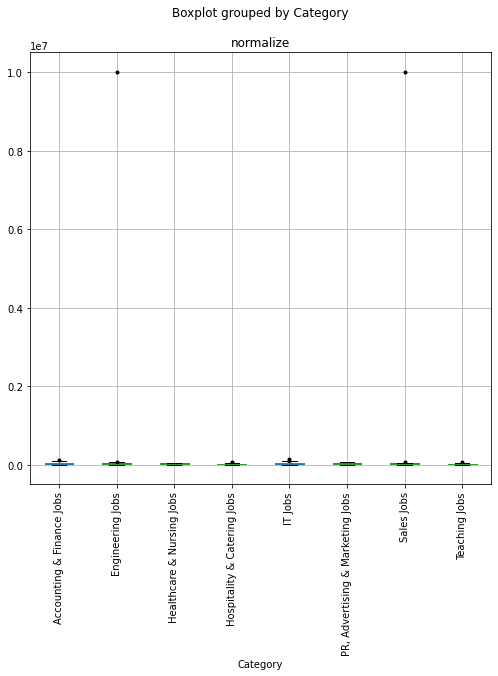

In [82]:
# check outliers by Category
df.boxplot(column='normalize', by = 'Category',sym='k.', figsize=(8, 8), rot = 90)

there are 10 outliers in salary


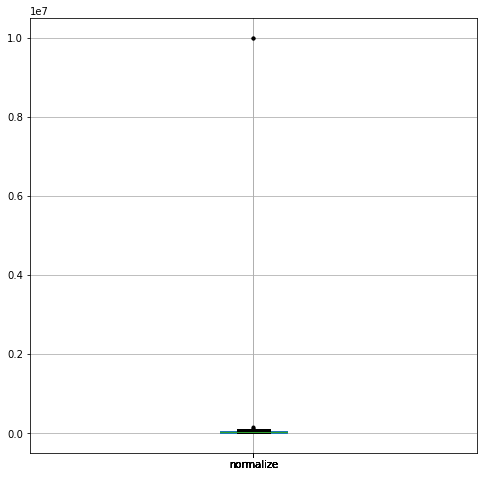

In [83]:
# loop through all categorical type to find outliers. If there are oultiers
outliers_list = []
for cat in df.Category.unique():
    # get a boxplot to observer and find outliers
    _,a = df[df['Category'] == cat].boxplot(column='normalize',sym='k.', figsize=(8, 8), return_type='both') 
    
    # outlier.get_ydata return values on the y axis
    outliers = [flier.get_ydata() for flier in a["fliers"]] # extract the outlier values
    
    # if the type have outliers
    if len(outliers[0])>0:
    # get the indinces that have outliers
        condition = (df['Category'] == cat) & (df['normalize'] >= min(outliers[0]))
        indices = df[condition].index
        
        for i in indices:
            outliers_list.append(i)
            
            
 
print('there are', len(outliers_list), 'outliers in salary')

In [84]:
# Check display outliers by categry
df.loc[outliers_list, ['Category', 'Salary', 'normalize']]

,Category,Salary,normalize
48952,Accounting & Finance Jobs,120000,120000.0
23775,IT Jobs,150000,150000.0
25190,IT Jobs,100000,100000.0
45677,Engineering Jobs,10000000,10000000.0
46418,Engineering Jobs,80000,80000.0
13689,Sales Jobs,80000,80000.0
46326,Sales Jobs,10000000,10000000.0
47,Hospitality & Catering Jobs,80000,80000.0
9754,Hospitality & Catering Jobs,60000,60000.0
43716,Teaching Jobs,80000,80000.0


In [85]:
outliers_list

[48952, 23775, 25190, 45677, 46418, 13689, 46326, 47, 9754, 43716]

In [86]:
# update error list for outliers
for i in outliers_list:
    updateErlist(i, df.loc[i, 'ID'], 'Salary', df.loc[i,'Salary'], df.loc[i,'normalize'], 'Outliers',"droped") 
            

# drop outliers by mean based on category
df.drop(outliers_list, inplace=True)


In [87]:
# number of missing values group by category
df[df.normalize.isna()].Category.value_counts()


IT Jobs                             625
Healthcare & Nursing Jobs           411
Engineering Jobs                    392
Accounting & Finance Jobs           340
Hospitality & Catering Jobs         225
Sales Jobs                          212
Teaching Jobs                       155
PR, Advertising & Marketing Jobs    138
Name: Category, dtype: int64

In [88]:
# locate missing value
indices = df[df.normalize.isna()].index

# fill missing value by the mean grouped by Category
df.normalize.fillna(df.groupby('Category')['normalize'].transform('mean').round(2), inplace=True)


# update error list for missing values
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'Salary',df.loc[i, 'Salary'], df.loc[i, 'normalize'], 'mising value', 'fill by mean group by category') 

In [89]:
df.Salary.isna().sum()

0

In [90]:
# report convert Salary to float
updateErlist('ALL', 'ALL', 'Salary','ALL', 'ALL', 'wrong data type', 'convert to float')  
    

In [91]:
# drop the original salary column as all the values have been transfer
df.drop('Salary', axis=1, inplace=True)

# rename normalize column to salary
df.rename(columns={'normalize':'Salary'},  inplace=True)

#### 2.9. OpenDate 

In [92]:
df.OpenDate.head()

0    20130112T000000
1    20131215T120000
2    20130706T000000
3    20130916T150000
4    20120404T150000
Name: OpenDate, dtype: object

In [93]:
# subtract T
df.OpenDate = df.OpenDate.apply(lambda x: re.sub('T', '', x))

# report error
updateErlist('ALL', 'ALL', 'OpenDate','ALL', 'ALL', 'Irregularities,', 'subtract T')



In [94]:
print('max:', df.OpenDate.max())
print("min:", df.OpenDate.min())

max: 20131712150000
min: 20120101000000


check on year

In [95]:
# check year are not 2013 or 2012
df.OpenDate.apply(lambda x: re.findall(r'^[^2][^0][^1][^23].+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

check on month

In [96]:
# check the months are not from 1 to 12
df.OpenDate.apply(lambda x: re.findall(r'^\d{4}[1][^012]\d{8}$', x)).astype('str').value_counts()

[]                    50692
['20131712150000']        1
Name: OpenDate, dtype: int64

In [97]:
df[df.OpenDate == '20131712150000']

,ID,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary
49468,70420213,Credit New Business Producer,South East England,Lawes Insurance Recruitment,non_specificed,permanent,Accounting & Finance Jobs,20131712150000,20140215T150000,insurancejobs.co.uk,60000.0


In [98]:
#report error
updateErlist(49468, 70420213, 'OpenDate','20131712150000', '20131217150000', 'Violations of the Integrity constraint', 'swap month to 12, day to 17')

# fix
df.loc[df.OpenDate == '20131712150000', 'OpenDate'] = '20131217150000'

check date

In [99]:
# 2012 is leap year where 2013 is not
df.OpenDate.apply(lambda x: re.findall(r'^20130229.+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

In [100]:
# check for day 30 or 31 in all month
df.OpenDate.apply(lambda x: re.findall(r'^d{6}3[10].+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

In [101]:
# check for day greater than 31
df.OpenDate.apply(lambda x: re.findall(r'^d{6}3[^10].+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

check hour

In [102]:
# find hour greater than 23
df.OpenDate.apply(lambda x: re.findall(r'^d{8}2[^0123].+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

check minute

In [103]:
# find hour greater than 23
df.OpenDate.apply(lambda x: re.findall(r'^d{10}6\d.+$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

check second

In [104]:
# check second more than 60
df.OpenDate.apply(lambda x: re.findall(r'^d{12}6\d$', x)).astype('str').value_counts()

[]    50693
Name: OpenDate, dtype: int64

In [105]:
# convert to date time
df['OpenDate'] = pd.to_datetime(df['OpenDate'], format='%Y%m%d%H%M%S')

# report
updateErlist('ALL', 'ALL', 'OpenDate','ALL', 'ALL', 'wrong data type', 'convert to datetime')

In [106]:
df['OpenDate'].head()

0   2013-01-12 00:00:00
1   2013-12-15 12:00:00
2   2013-07-06 00:00:00
3   2013-09-16 15:00:00
4   2012-04-04 15:00:00
Name: OpenDate, dtype: datetime64[ns]

#### 2.10. CloseDate 

In [107]:
df.CloseDate.head()

0    20130313T000000
1    20140315T120000
2    20130904T000000
3    20131016T150000
4    20120703T150000
Name: CloseDate, dtype: object

In [108]:
# subtract T
df.CloseDate = df.CloseDate.apply(lambda x: re.sub('T', '', x))

# report error
updateErlist('ALL', 'ALL', 'CloseDate','ALL', 'ALL', 'Irregularities', 'subtract T')

In [109]:
print('max: ',df.CloseDate.max())
print('min: ', df.CloseDate.min())

max:  20140331150000
min:  20120115120000


check year

In [110]:
# check year not in 2012-2014
df.CloseDate.apply(lambda x: re.findall(r'^201[^234].+$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

check month

In [111]:
# check for moth not from 1 to 12
df.CloseDate.apply(lambda x: re.findall(r'^\d{4}[1][^012]\d{8}$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

check date

In [112]:
# check if 2013 has 29 days in feb
df.CloseDate.apply(lambda x: re.findall(r'^20130229.+$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

In [113]:
# check if there is day greater than 31
df.CloseDate.apply(lambda x: re.findall(r'^d{6}3[^10]\d{6}$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

In [114]:
# day month with 30 and 31
df.CloseDate.apply(lambda x: re.findall(r'^d{6}3[10]\d{6}$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

check hour

In [115]:
# check hour
df.CloseDate.apply(lambda x: re.findall(r'^d{8}2[^0123].+$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

check minute

In [116]:
# check minute more than 60
df.CloseDate.apply(lambda x: re.findall(r'^d{10}6\d.+$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

check second

In [117]:
# check second more than 60
df.CloseDate.apply(lambda x: re.findall(r'^d{12}6\d$', x)).astype('str').value_counts()

[]    50693
Name: CloseDate, dtype: int64

In [118]:
# convert to date time'CloseDate'
df['CloseDate'] = pd.to_datetime(df['CloseDate'], format='%Y%m%d%H%M%S')

# report
updateErlist('ALL', 'ALL', 'CloseDate','ALL', 'ALL', 'wrong datatype', 'convert to datetime')

## check if Close date < Opendate

In [119]:
# create a column to check for the violations
df['violated'] = df.apply(lambda x: x.CloseDate < x.OpenDate, axis = 1)
df[df['violated']]

,ID,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary,violated
16414,67382472,Risk Platforms Project Manager,London,Investigo Change Solutions,non_specificed,non_specificed,Accounting & Finance Jobs,2013-05-02 12:00:00,2013-04-18 12:00:00,eFinancialCareers,60000.0,True
40287,67098385,Lead Internal Auditor,Bedfordshire,Randstad Financial & Professional,full_time,permanent,Accounting & Finance Jobs,2013-03-16 15:00:00,2013-01-15 15:00:00,GAAPweb,55000.0,True
40624,70570298,KS**** booster teacher needed ASAP,Ealing,Capita Education,full_time,contract,Teaching Jobs,2012-12-09 15:00:00,2012-11-09 15:00:00,jobs.newstatesman.com,33000.0,True
46309,71216010,AWARDS PROJECT OFFICER,Bedford,BlueTownOnline.co.uk,full_time,non_specificed,Sales Jobs,2012-06-05 00:00:00,2012-03-07 00:00:00,careerbuilder.com,30000.0,True
46366,71213560,Senior Sales/Sales Executive,Guildford,BMS Recruitment,full_time,non_specificed,Sales Jobs,2012-09-09 00:00:00,2012-08-10 00:00:00,careerbuilder.com,50000.0,True


In [120]:
# index of error
indices = df[df['violated']].index


#report error for Opendate
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'OpenDate',df.loc[i, 'OpenDate'], df.loc[i, 'CloseDate'], 'Violations of the Integrity constraint', 'swap to closedate value')

    
#report error for Closedate
for i in indices:
    updateErlist(i, df.loc[i, 'ID'], 'CloseDate',df.loc[i, 'CloseDate'], df.loc[i, 'OpenDate'], 'Violations of the Integrity constraint', 'swap to opendate value')

# swap Opendate and CloseDate for each other
for i in indices:
    openDate = df.loc[i, 'OpenDate']
    df.loc[i, 'OpenDate'] = df.loc[i,'CloseDate']
    df.loc[i, 'CloseDate'] = openDate
    
# reasure data have been swapped 
df[df['violated']]

,ID,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary,violated
16414,67382472,Risk Platforms Project Manager,London,Investigo Change Solutions,non_specificed,non_specificed,Accounting & Finance Jobs,2013-04-18 12:00:00,2013-05-02 12:00:00,eFinancialCareers,60000.0,True
40287,67098385,Lead Internal Auditor,Bedfordshire,Randstad Financial & Professional,full_time,permanent,Accounting & Finance Jobs,2013-01-15 15:00:00,2013-03-16 15:00:00,GAAPweb,55000.0,True
40624,70570298,KS**** booster teacher needed ASAP,Ealing,Capita Education,full_time,contract,Teaching Jobs,2012-11-09 15:00:00,2012-12-09 15:00:00,jobs.newstatesman.com,33000.0,True
46309,71216010,AWARDS PROJECT OFFICER,Bedford,BlueTownOnline.co.uk,full_time,non_specificed,Sales Jobs,2012-03-07 00:00:00,2012-06-05 00:00:00,careerbuilder.com,30000.0,True
46366,71213560,Senior Sales/Sales Executive,Guildford,BMS Recruitment,full_time,non_specificed,Sales Jobs,2012-08-10 00:00:00,2012-09-09 00:00:00,careerbuilder.com,50000.0,True


In [121]:
# drop violated column
df.drop('violated', axis=1, inplace=True)

##### 2.11. Source Name

In [122]:
source = df.SourceName.value_counts()
source[source <9]

3desk.com                 8
legalprospects.com        8
ncejobs.co.uk             8
jobsinsocialwork.co.uk    6
wikijob.co.uk             6
cardandpaymentjobs.com    6
workthing.com             4
scotsman.com              4
jobs.gponline.com         3
TotallyExec               2
thegraduate.co.uk         1
grb.uk.com                1
hsjjobs.com               1
cvjobstore.com            1
Name: SourceName, dtype: int64

In [123]:
print('no missing value in Source Name')
df.SourceName.apply(lambda x: re.findall(r'^\W+$|^\d+$', x)).astype('str').value_counts()

no missing value in Source Name


[]    50693
Name: SourceName, dtype: int64

......

## Saving data


In [124]:
# organize the other of columns
df = df[['ID', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime','Category',  'Salary','OpenDate', 'CloseDate', 'SourceName']]

In [125]:
# code to save output data
df.to_csv('S3828276_dataset1_solution.csv', index=False)
erlist.to_csv('S3828276_errorlist.csv', index=False)

## Summary


There were 107 data sources and 50703 job ads in the data set<br>
In task 1 and 2, infomation of each job ad were imported into a data frame.<br>
The errors were reported and fixed according to the requirement.
There were 10 outliers deteted and discarded.
The cleaned data was exported into a csv file for further analysis
